In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

#### Data

In [13]:
# Load CFashionMNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0,), (1.0/255.0,))])

trainset = torchvision.datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=1024, num_workers=10, shuffle=True)

testset = torchvision.datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1024, num_workers=10, shuffle=False)

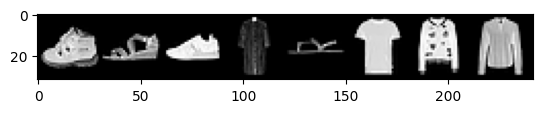

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display the images
def imshow(img):
    img = img / 255.0
    np_img = img.numpy()
    plt.imshow(np.transpose(np_img, (1, 2, 0)))
    plt.show()

for i, (images, labels) in enumerate(trainloader, 0):
    # Plot some images
    imshow(torchvision.utils.make_grid(images[:8]))  # Display 8 images from the batch
    break

#### Model

In [15]:
model = nn.Sequential(
    nn.Flatten(), 
    nn.Linear(784, 10)
)
model = model

print(model)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=10, bias=True)
)


In [16]:
# Generating a random tensor
input_tensor = torch.rand(5, 1, 28, 28)
print(input_tensor.shape)

torch.Size([5, 1, 28, 28])


In [17]:
# Feeding the tensor into the model
output = model(input_tensor)
print(output.shape)

torch.Size([5, 10])


#### Loss, Optimizer, and Evaluation Function

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.00001)

In [19]:
# Function to compute loss and accuracy for test set
def evaluate(model, testloader, criterion):
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in testloader:

            outputs = model(images)
            loss = criterion(outputs, labels)
            test_loss += loss.item()
            
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    test_loss = test_loss / len(testloader)
    return test_loss, accuracy

In [20]:
test_loss, test_accuracy = evaluate(model, testloader, criterion)
print(f'test_loss: {test_loss}')
print(f'test_accuracy: {test_accuracy}')

test_loss: 122.42520523071289
test_accuracy: 1.88


#### Train

In [21]:
# some parameter
train_losses = []
train_accuracies = []
test_losses = []
test_accuracies = []
max_epoch = 10

In [22]:
# train
for epoch in range(max_epoch):
    running_loss = 0.0
    running_correct = 0   # to track number of correct predictions
    total = 0             # to track total number of samples

    for i, (inputs, labels) in enumerate(trainloader, 0):

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        running_loss += loss.item()

        # Determine class predictions and track accuracy
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        running_correct += (predicted == labels).sum().item()

        # Backward pass and optimization
        loss.backward()
        optimizer.step()        

    epoch_accuracy = 100 * running_correct / total
    epoch_loss = running_loss / (i + 1)
    test_loss, test_accuracy = evaluate(model, testloader, criterion)
    print(f"Epoch [{epoch + 1}/{max_epoch}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%")
    
    # save for plot
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

Epoch [1/10], Loss: 36.0986, Accuracy: 26.38%, Test Loss: 18.8793, Test Accuracy: 42.46%
Epoch [2/10], Loss: 15.5798, Accuracy: 49.35%, Test Loss: 13.9255, Test Accuracy: 52.12%
Epoch [3/10], Loss: 12.5199, Accuracy: 55.85%, Test Loss: 11.9114, Test Accuracy: 56.04%
Epoch [4/10], Loss: 10.9225, Accuracy: 59.06%, Test Loss: 10.6558, Test Accuracy: 58.83%
Epoch [5/10], Loss: 9.8463, Accuracy: 61.35%, Test Loss: 9.7076, Test Accuracy: 60.92%
Epoch [6/10], Loss: 9.0466, Accuracy: 63.11%, Test Loss: 9.0095, Test Accuracy: 62.82%
Epoch [7/10], Loss: 8.4597, Accuracy: 64.50%, Test Loss: 8.4890, Test Accuracy: 63.95%
Epoch [8/10], Loss: 7.9760, Accuracy: 65.57%, Test Loss: 8.0469, Test Accuracy: 65.15%
Epoch [9/10], Loss: 7.5915, Accuracy: 66.58%, Test Loss: 7.7191, Test Accuracy: 65.90%
Epoch [10/10], Loss: 7.2600, Accuracy: 67.28%, Test Loss: 7.4109, Test Accuracy: 66.72%


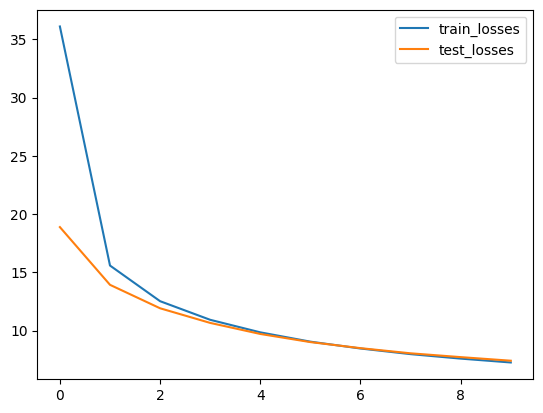

In [23]:
import matplotlib.pyplot as plt

plt.plot(train_losses, label='train_losses')
plt.plot(test_losses, label='test_losses')
plt.legend()

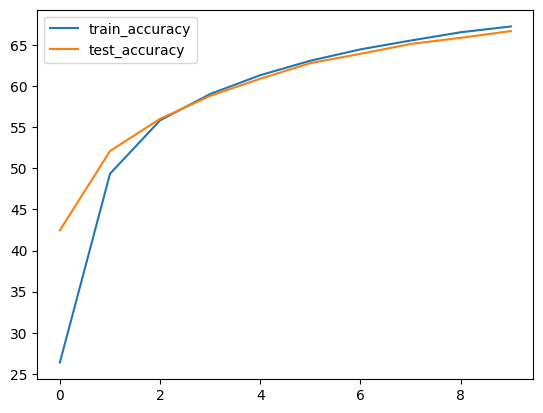

In [24]:
import matplotlib.pyplot as plt

plt.plot(train_accuracies, label='train_accuracy')
plt.plot(test_accuracies, label='test_accuracy')
plt.legend()